In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import math
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
from xgboost import XGBClassifier
xgb=XGBClassifier()

# Reading the Data

In [2]:
hd = pd.read_csv(r"E:\DataSets\archive1\heart_disease_health_indicators_BRFSS2015.csv")
hd

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
hd.head(1)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0


In [4]:
hd.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [5]:
hd.tail(1)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
hd.shape

(253680, 22)

In [7]:
hd.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Cleaning the data

# 1. Checking for dtypes

In [9]:
hd.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# 2.Checkikng for null values

In [10]:
hd.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Checking for duplicate Values

In [11]:
print("Duplicate Values =", hd.duplicated().sum())

Duplicate Values = 23899


In [12]:
hd.drop_duplicates(inplace=True)

In [13]:
print("Duplicate Values =", hd.duplicated().sum())

Duplicate Values = 0


# checking the value count of target variable

In [14]:
hd.HeartDiseaseorAttack.value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

# Base Models

In [15]:
x=hd.iloc[:,1:22]
x.head(1)
y=hd.iloc[:,0]
y.head(2)

0    0.0
1    0.0
Name: HeartDiseaseorAttack, dtype: float64

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((183824, 21), (183824,), (45957, 21), (45957,))

# 1. LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
p_lg=lg.predict(xtest)
p_lg

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
from sklearn.metrics import confusion_matrix
m1=confusion_matrix(p_lg,ytest)
acc=m1.diagonal().sum()/m1.sum()*100
m1,acc

(array([[40625,  4208],
        [  520,   604]], dtype=int64),
 89.71212220118807)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(p_lg,ytest))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     44833
         1.0       0.13      0.54      0.20      1124

    accuracy                           0.90     45957
   macro avg       0.56      0.72      0.57     45957
weighted avg       0.97      0.90      0.93     45957



In [20]:
precision_lg = precision_score(ytest, p_lg)
recall_lg = recall_score(ytest, p_lg)
f1_lg = f1_score(ytest, p_lg)
precision_lg,recall_lg,f1_lg

(0.5373665480427047, 0.1255195344970906, 0.20350404312668463)

# 2.Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt_p=dt.predict(xtest)
dt_p

array([1., 1., 0., ..., 0., 0., 0.])

In [22]:
dt.feature_importances_

array([0.01898957, 0.01583387, 0.00395915, 0.19414438, 0.02821001,
       0.02272565, 0.02967703, 0.0335099 , 0.03917497, 0.03035973,
       0.01013598, 0.0085901 , 0.01511047, 0.07271147, 0.06498257,
       0.08978834, 0.02323632, 0.01932858, 0.090192  , 0.07941832,
       0.1099216 ])

In [23]:
dt_cf=confusion_matrix(dt_p,ytest)
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_cf,dt_acc

(array([[36983,  3466],
        [ 4162,  1346]], dtype=int64),
 83.4018756663838)

In [24]:
print(classification_report(dt_p,ytest))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     40449
         1.0       0.28      0.24      0.26      5508

    accuracy                           0.83     45957
   macro avg       0.59      0.58      0.58     45957
weighted avg       0.82      0.83      0.83     45957



In [25]:
precision_dt = precision_score(ytest,dt_p)
recall_dt = recall_score(ytest,dt_p)
f1_dt = f1_score(ytest,dt_p)
precision_dt, recall_dt, f1_dt

(0.24437182280319536, 0.2797173732335827, 0.26085271317829456)

# 3.Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_p=rf.predict(xtest)
rf_p

array([0., 1., 0., ..., 0., 0., 0.])

In [27]:
rf_cf=confusion_matrix(rf_p,ytest)
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_cf,rf_acc

(array([[40375,  4298],
        [  770,   514]], dtype=int64),
 88.9723001936593)

In [28]:
print(classification_report(rf_p,ytest))

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94     44673
         1.0       0.11      0.40      0.17      1284

    accuracy                           0.89     45957
   macro avg       0.54      0.65      0.55     45957
weighted avg       0.96      0.89      0.92     45957



In [29]:
precision_rf = precision_score(ytest,rf_p)
recall_rf = recall_score(ytest,rf_p)
f1_rf = f1_score(ytest,rf_p)
precision_rf,recall_rf,f1_rf

(0.40031152647975077, 0.10681629260182876, 0.16863517060367453)

# 4. KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(xtrain,ytrain)
knn_p=knn.predict(xtest)
knn_p

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
knn_cf=confusion_matrix(knn_p,ytest)
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_cf,knn_ac

(array([[40938,  4622],
        [  207,   190]], dtype=int64),
 89.4923515460104)

In [32]:
print(classification_report(knn_p,ytest))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     45560
         1.0       0.04      0.48      0.07       397

    accuracy                           0.89     45957
   macro avg       0.52      0.69      0.51     45957
weighted avg       0.99      0.89      0.94     45957



In [33]:
precision_knn = precision_score(ytest,knn_p)
recall_knn = recall_score(ytest,knn_p)
f1_knn = f1_score(ytest,knn_p)
precision_knn, recall_knn, f1_knn

(0.47858942065491183, 0.03948462177888612, 0.07295066231522365)

# 5. Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
nb_p=nb.predict(xtest)
nb_p

array([0., 1., 1., ..., 1., 0., 0.])

In [35]:
nb_m=confusion_matrix(nb_p,ytest)
nb_ac=nb_m.diagonal().sum()/nb_m.sum()*100
nb_m,nb_ac

(array([[34957,  2941],
        [ 6188,  1871]], dtype=int64),
 80.13577909785235)

In [36]:
print(classification_report(nb_p,ytest))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     37898
         1.0       0.39      0.23      0.29      8059

    accuracy                           0.80     45957
   macro avg       0.62      0.58      0.59     45957
weighted avg       0.77      0.80      0.78     45957



In [37]:
precision_nb = precision_score(ytest,nb_p)
recall_nb = recall_score(ytest,nb_p)
f1_nb = f1_score(ytest,nb_p)
precision_nb,recall_nb,f1_nb

(0.23216279935475864, 0.38881961762261014, 0.29073110092455906)

# 6. XGBoost

In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
xgb_p=xgb.predict(xtest)
xgb_p

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
xgb_m=confusion_matrix(xgb_p,ytest)
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_m,xgb_acc


(array([[40689,  4263],
        [  456,   549]], dtype=int64),
 89.73170572491676)

In [40]:
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     44952
           1       0.11      0.55      0.19      1005

    accuracy                           0.90     45957
   macro avg       0.55      0.73      0.57     45957
weighted avg       0.97      0.90      0.93     45957



In [41]:
precision_xgb = precision_score(ytest, xgb_p)
recall_xgb = recall_score(ytest, xgb_p)
f1_xgb = f1_score(ytest, xgb_p)
precision_xgb,recall_xgb,f1_xgb

(0.5462686567164179, 0.11408977556109726, 0.1887570912841671)

# BASEMODEL DATAFRAME

In [42]:
l1=["LG","DT","RF","KNN","NB","XGB"]
l2=[acc,dt_acc,rf_acc,knn_ac,nb_ac,xgb_acc]
l3=[precision_lg,precision_dt,precision_rf,precision_knn,precision_nb,precision_xgb]
l4=[recall_lg,recall_dt,recall_dt,recall_rf,recall_nb,recall_xgb]
l5=[f1_lg,f1_dt,f1_rf,f1_knn,f1_nb,f1_xgb]

In [43]:
BaseModels=pd.DataFrame({"Model Name":l1,"Accuracy":l2,"Precision":l3,"Recall":l4,"F1-Score":l5})
BaseModels

,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,89.712122,0.537367,0.125520,0.203504
1,DT,83.401876,0.244372,0.279717,0.260853
2,RF,88.972300,0.400312,0.279717,0.168635
3,KNN,89.492352,0.478589,0.106816,0.072951
4,NB,80.135779,0.232163,0.388820,0.290731
5,XGB,89.731706,0.546269,0.114090,0.188757


# BASEMODEL CONCLUSION: 
   Out of these models,LogisticRegression And XGB is better compared to others though every models are having low precision,recall and f1 score
This is due to the Class Imbalance problem in this Dataset.

# Class Imbalance

In [44]:
hd['HeartDiseaseorAttack'].value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

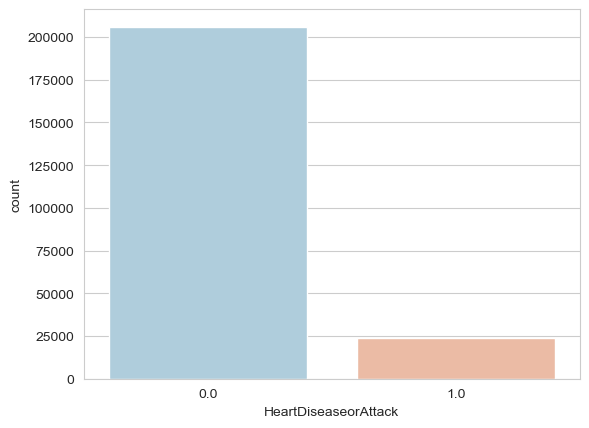

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDiseaseorAttack',data=hd,palette='RdBu_r')

# SMOTE - Synthetic Minority Oversampling Technique

In [46]:
sx=hd.iloc[:,1:22]
sy=hd.iloc[:,0]
sx.shape,sy.shape

((229781, 21), (229781,))

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(sx,sy)

In [48]:
x_smote.shape,y_smote.shape

((412128, 21), (412128,))

In [49]:
y_smote.value_counts()

0.0    206064
1.0    206064
Name: HeartDiseaseorAttack, dtype: int64

# Exploratory Data Analysis

# 1.OUTLIER TREATMENT

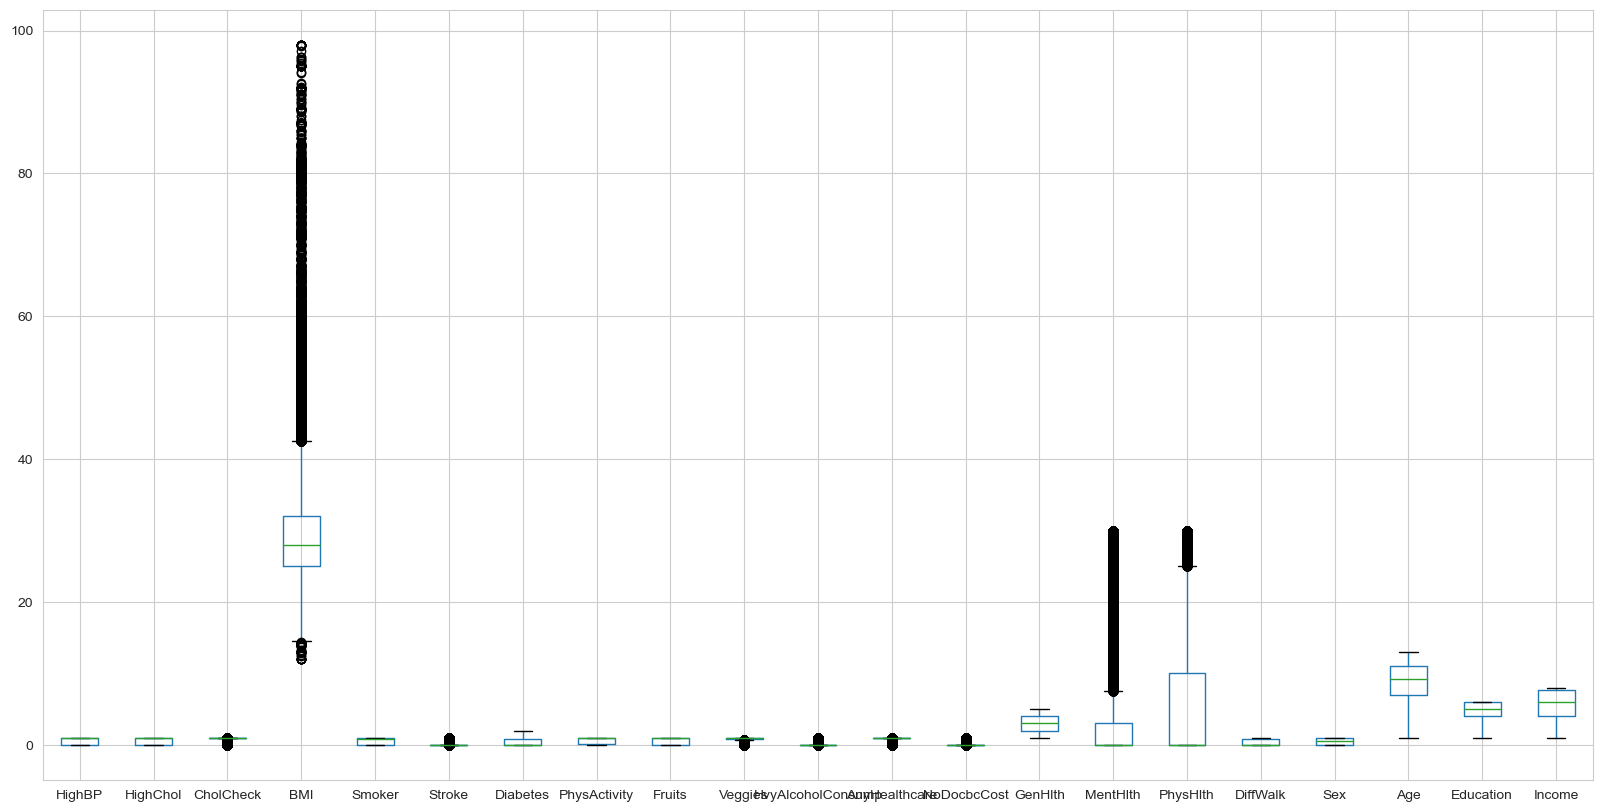

In [50]:
x_smote.boxplot(figsize=(20,10))
plt.show()

In [51]:
x_smote.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [52]:
x_smote.BMI.value_counts()

27.000000    31145
26.000000    25112
24.000000    22903
28.000000    21103
25.000000    20308
             ...  
29.790285        1
31.891364        1
32.466236        1
33.689530        1
48.642480        1
Name: BMI, Length: 97327, dtype: int64

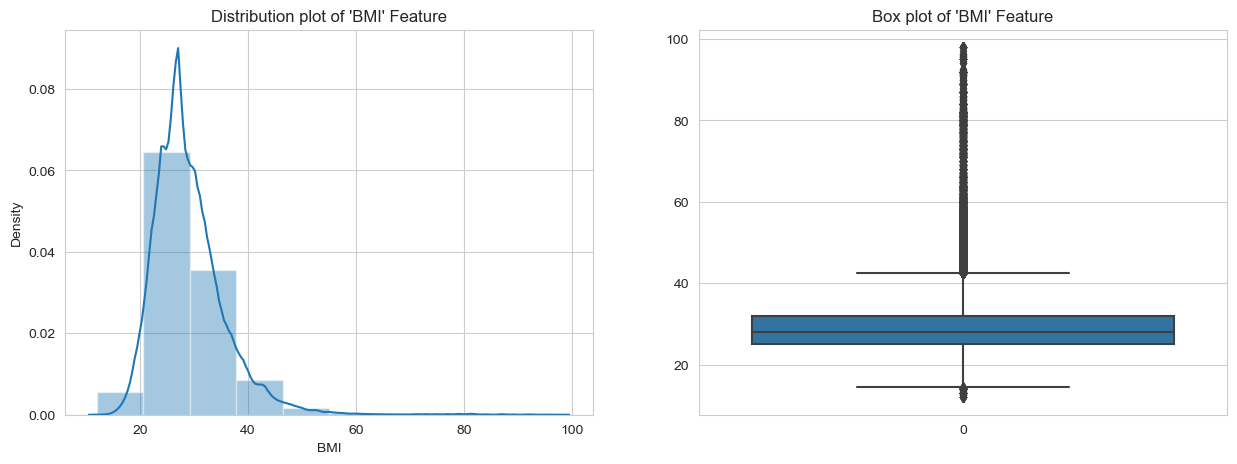

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(x_smote['BMI'], ax=ax[0], bins=10)
sns.boxplot(x_smote['BMI'], ax=ax[1])
ax[1].set_title("Box plot of 'BMI' Feature")
ax[0].set_title("Distribution plot of 'BMI' Feature")
plt.show()

In [54]:
q25,q75=np.percentile(x_smote.BMI,(25,75))
qr=q75-q25
max=q75+qr*1.5
min=q25-qr*1.5
x_smote.BMI[x_smote.BMI>max]=max
x_smote.BMI[x_smote.BMI<min]=min
q25,q75,qr,max,min

(25.0, 32.0, 7.0, 42.5, 14.5)

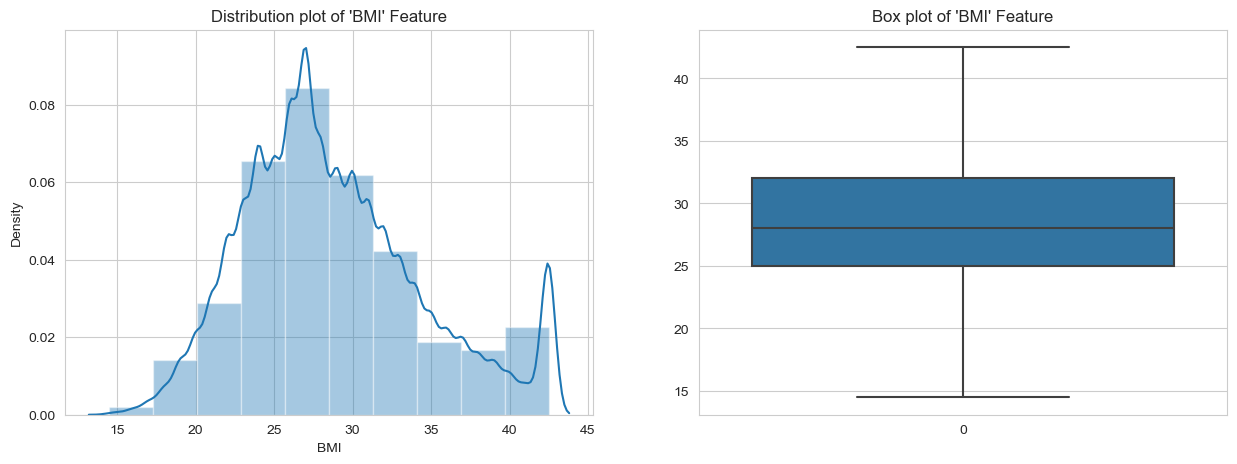

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(x_smote['BMI'], ax=ax[0], bins=10)
sns.boxplot(x_smote['BMI'], ax=ax[1])
ax[1].set_title("Box plot of 'BMI' Feature")
ax[0].set_title("Distribution plot of 'BMI' Feature")
plt.show()

# 2.SKEWNESS TREATMENT

In [56]:
x_smote.skew()

HighBP              -0.381907
HighChol            -0.263247
CholCheck           -5.891931
BMI                  0.577731
Smoker              -0.155270
Stroke               2.822627
Diabetes             1.210263
PhysActivity        -0.863405
Fruits              -0.471833
Veggies             -1.415729
HvyAlcoholConsump    4.310250
AnyHealthcare       -4.486912
NoDocbcCost          2.735649
GenHlth              0.093174
MentHlth             2.264734
PhysHlth             1.438392
DiffWalk             0.967211
Sex                 -0.007994
Age                 -0.691212
Education           -0.567786
Income              -0.542691
dtype: float64

# 3.VISUALIZATION

In [57]:
v=pd.concat([x_smote,y_smote],axis=1)
v

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
0,1.000000,1.000000,1.000000,40.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,5.000000,18.0,15.000000,1.000000,0.000000,9.000000,4.000000,3.000000,0.0
1,0.000000,0.000000,0.000000,25.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,1.000000,3.000000,0.0,0.000000,0.000000,0.000000,7.000000,6.000000,1.000000,0.0
2,1.000000,1.000000,1.000000,28.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,1.000000,5.000000,30.0,30.000000,1.000000,0.000000,9.000000,4.000000,8.000000,0.0
3,1.000000,0.000000,1.000000,27.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,11.000000,3.000000,6.000000,0.0
4,1.000000,1.000000,1.000000,24.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,3.0,0.000000,0.000000,0.000000,11.000000,5.000000,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412123,1.000000,0.000000,1.000000,24.000000,0.000000,0.0,0.000000,0.323681,0.323681,1.000000,...,0.000000,4.323681,0.0,30.000000,1.000000,0.000000,13.000000,4.000000,3.676319,1.0
412124,0.369755,1.000000,1.000000,30.630245,0.369755,0.0,2.000000,1.000000,1.000000,0.630245,...,0.630245,3.739509,30.0,4.260491,0.000000,0.369755,7.000000,5.630245,8.000000,1.0
412125,0.937163,0.937163,0.937163,28.937163,1.000000,0.0,0.000000,0.062837,0.062837,0.062837,...,1.000000,3.000000,30.0,0.000000,0.937163,1.000000,8.937163,4.062837,1.937163,1.0
412126,1.000000,1.000000,0.426692,28.573308,1.000000,0.0,0.573308,0.000000,0.426692,0.000000,...,0.000000,3.000000,0.0,0.000000,0.000000,0.000000,10.000000,4.000000,4.426692,1.0


# Correlation matrix

In [58]:
pp = v.corr() 
pp.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
HighBP,1.000000,0.345485,0.123343,0.215762,0.106896,0.150853,0.276907,-0.115622,-0.020447,-0.039780,...,0.009208,0.321930,0.05461,0.173833,0.245324,0.063895,0.355719,-0.130452,-0.172818,0.366206
HighChol,0.345485,1.000000,0.107532,0.111535,0.110710,0.108703,0.212912,-0.069176,-0.027628,-0.021764,...,0.007580,0.233081,0.05965,0.130915,0.161787,0.060567,0.274936,-0.063712,-0.083682,0.322769


# HeatMap - Correlation Plot

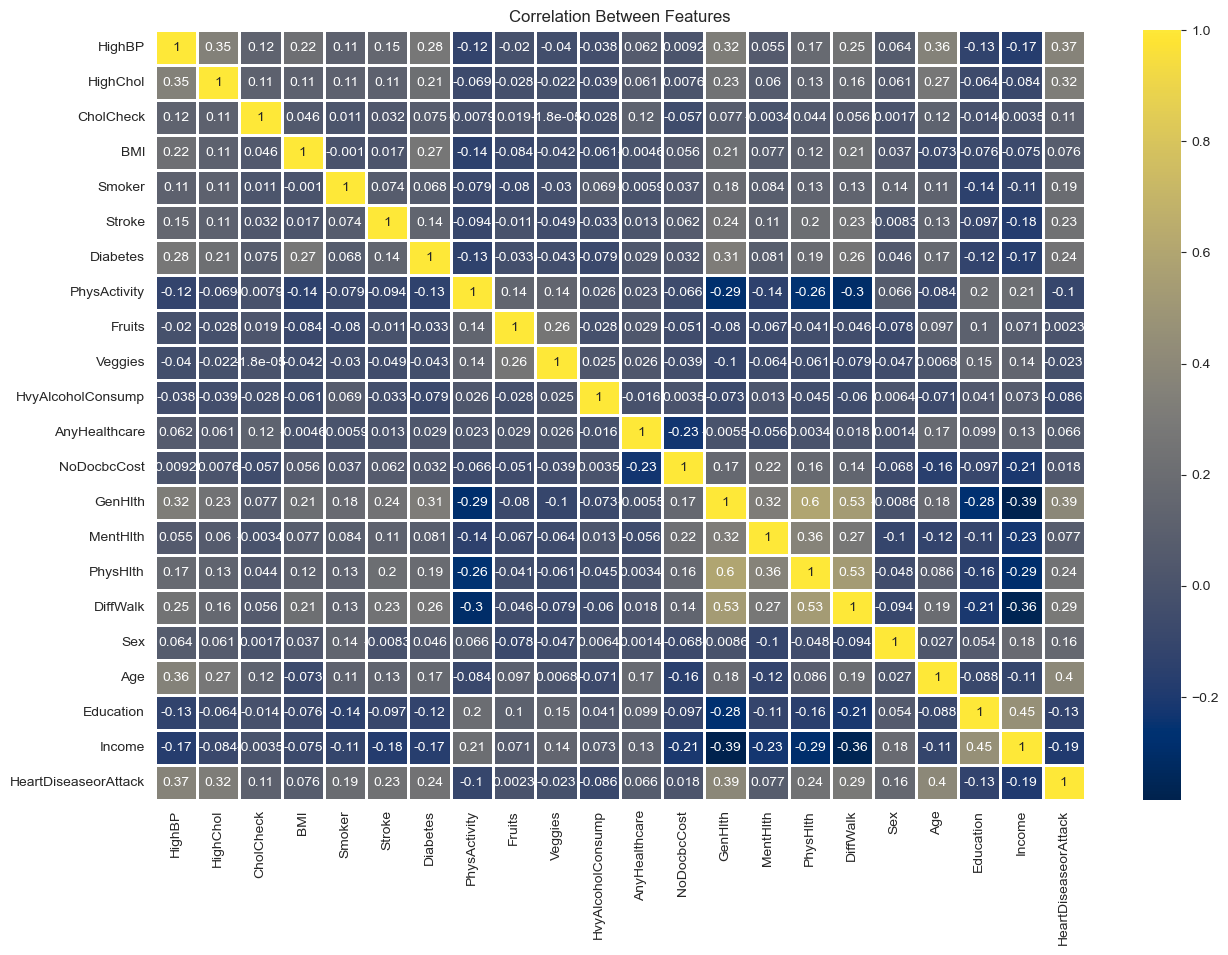

In [59]:
plt.figure(figsize = (15,10))
heatmap = sns.heatmap(pp,linewidth = 1,annot = True,cmap = 'cividis')
plt.title("Correlation Between Features")
plt.show()

In [60]:
hd.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

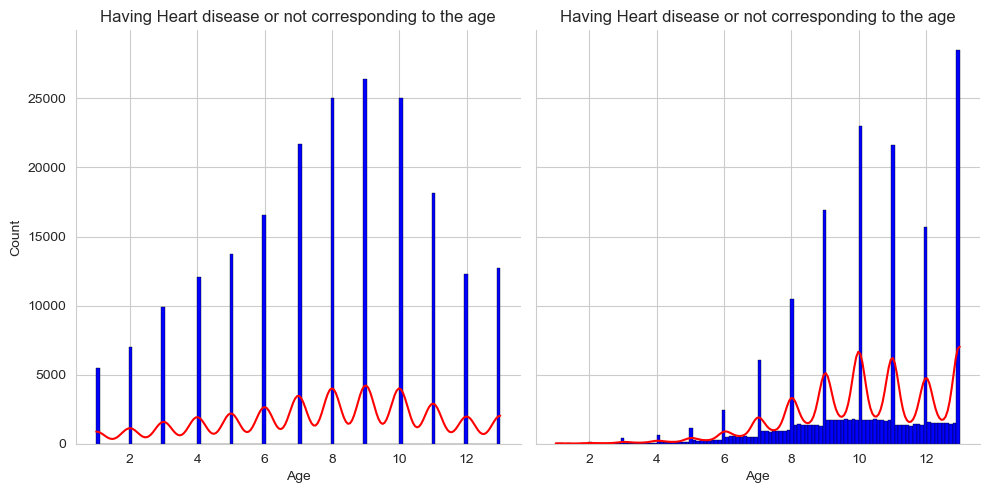

In [61]:
sns.displot(data=v, x="Age", col="HeartDiseaseorAttack",kde=True,color="red",facecolor="blue",edgecolor="black").set(title='Having Heart disease or not corresponding to the age')
plt.show()

Having Heart disease or not corresponding to the age

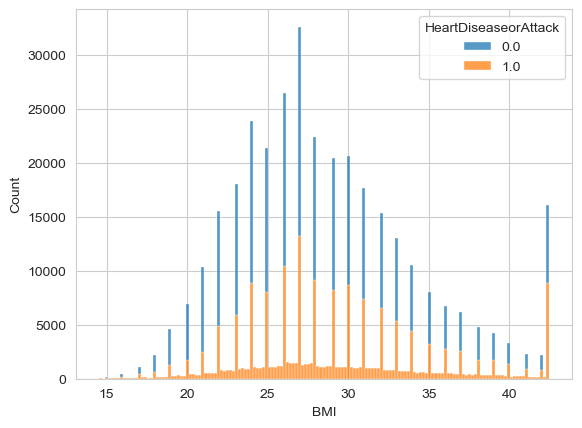

In [62]:
sns.histplot(data=v,x="BMI",hue="HeartDiseaseorAttack",multiple="stack")
plt.show()

Having heart disease or not with respect to bmi

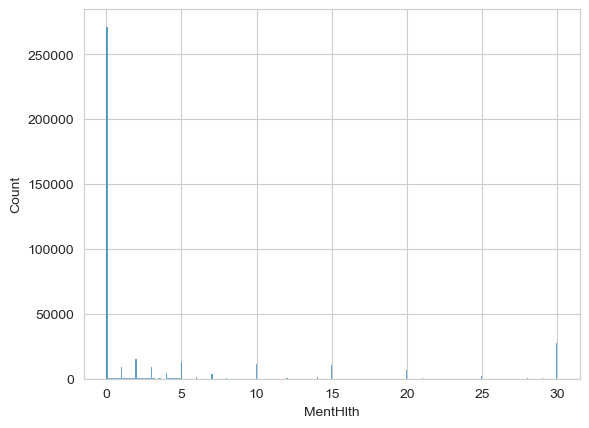

In [63]:
sns.histplot(data=v, x='MentHlth')
fig.show()

<Axes: xlabel='PhysHlth', ylabel='Count'>

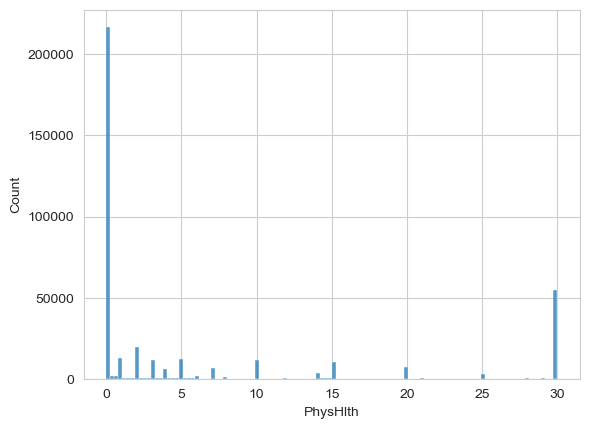

In [64]:
sns.histplot(data=v, x="PhysHlth")

<Axes: xlabel='Income'>

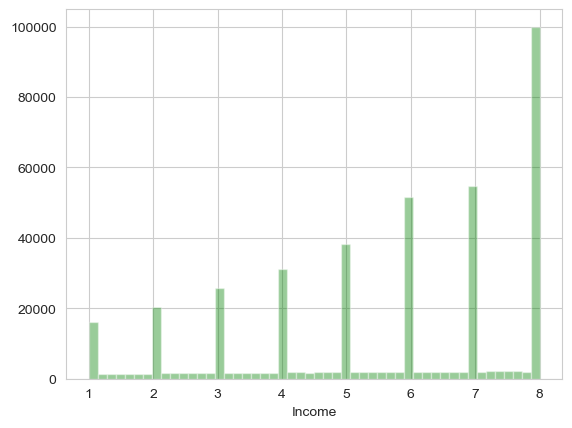

In [65]:
sns.distplot(v['Income'], kde=False, color='Green')

# SPLITTING OF DATA

In [66]:
xs_tr,xs_te,ys_tr,ys_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [67]:
xs_tr.shape,xs_te.shape,ys_tr.shape,ys_te.shape

((329702, 21), (82426, 21), (329702,), (82426,))

# 1.Logistic Regression

In [68]:
lg.fit(xs_tr,ys_tr)
sm_p1=lg.predict(xs_te)
sm_p1

array([1., 0., 1., ..., 0., 0., 1.])

In [69]:
sm_cf1=confusion_matrix(sm_p1,ys_te)
sm_ac1=sm_cf1.diagonal().sum()/sm_cf1.sum()*100
sm_ac1,sm_cf1

(76.68575449494092,
 array([[30383,  8290],
        [10927, 32826]], dtype=int64))

In [70]:
print(classification_report(sm_p1,ys_te))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76     38673
         1.0       0.80      0.75      0.77     43753

    accuracy                           0.77     82426
   macro avg       0.77      0.77      0.77     82426
weighted avg       0.77      0.77      0.77     82426



In [71]:
precision_smlg = precision_score(ys_te, sm_p1)
recall_smlg = recall_score(ys_te, sm_p1)
f1_smlg = f1_score(ys_te, sm_p1)
precision_smlg, recall_smlg, f1_smlg

(0.7502571252256988, 0.7983753283393327, 0.7735686764307345)

# 2. DT

In [72]:
dt.fit(xs_tr,ys_tr)
sm_p2=dt.predict(xs_te)
sm_p2

array([1., 1., 1., ..., 0., 0., 1.])

In [73]:
dt.feature_importances_

array([0.27107886, 0.1231299 , 0.00117258, 0.05768817, 0.05423131,
       0.03180661, 0.01157446, 0.01551888, 0.01682999, 0.01272386,
       0.00408184, 0.00259812, 0.00578154, 0.08536554, 0.01815432,
       0.02601876, 0.01789076, 0.07375513, 0.10648538, 0.02815011,
       0.03596388])

In [74]:
sm_cf2=confusion_matrix(sm_p2,ys_te)
dt_acc3=sm_cf2.diagonal().sum()/sm_cf2.sum()*100
dt_acc3,sm_cf2

(90.51998155921676,
 array([[37028,  3532],
        [ 4282, 37584]], dtype=int64))

In [75]:
print(classification_report(sm_p2,ys_te))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     40560
         1.0       0.91      0.90      0.91     41866

    accuracy                           0.91     82426
   macro avg       0.91      0.91      0.91     82426
weighted avg       0.91      0.91      0.91     82426



In [76]:
sm_dt_pre_score= precision_score(ys_te,sm_p2)
sm_dt_re_score= recall_score(ys_te,sm_p2)
sm_dt_f1_score= f1_score(ys_te,sm_p2)
sm_dt_pre_score,sm_dt_re_score,sm_dt_f1_score

(0.8977213012946066, 0.9140967020138145, 0.9058350003615241)

# 3. Random Forest

In [77]:
rf.fit(xs_tr,ys_tr)
sm_p3=rf.predict(xs_te)
sm_p3

array([0., 1., 1., ..., 0., 0., 1.])

In [78]:
sm_cf3=confusion_matrix(sm_p3,ys_te)
sm_ac3=sm_cf3.diagonal().sum()/sm_cf3.sum()*100
sm_ac3,sm_cf3

(94.06983233445757,
 array([[40254,  3832],
        [ 1056, 37284]], dtype=int64))

In [79]:
rf.feature_importances_

array([0.13316325, 0.10860091, 0.00194832, 0.06011156, 0.06739747,
       0.03391437, 0.01713523, 0.03040246, 0.02951397, 0.02150243,
       0.0074194 , 0.00396526, 0.0088374 , 0.10543217, 0.02076664,
       0.03000601, 0.05625299, 0.073244  , 0.11190854, 0.03490617,
       0.04357147])

In [80]:
print(classification_report(sm_p3,ys_te))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     44086
         1.0       0.91      0.97      0.94     38340

    accuracy                           0.94     82426
   macro avg       0.94      0.94      0.94     82426
weighted avg       0.94      0.94      0.94     82426



In [81]:
precision_smrf = precision_score(ys_te, sm_p3)
recall_smrf = recall_score(ys_te, sm_p3)
f1_smrf = f1_score(ys_te, sm_p3)
precision_smrf, recall_smrf, f1_smrf

(0.9724569640062598, 0.9068002724000389, 0.9384816753926702)

# 4. KNN

In [82]:
knn.fit(xs_tr,ys_tr)
sm_p5=knn.predict(xs_te)
sm_p5

array([1., 1., 0., ..., 0., 0., 1.])

In [83]:
knn_cf8=confusion_matrix(sm_p5,ys_te)
knn_acc3=knn_cf8.diagonal().sum()/knn_cf8.sum()*100
knn_acc3,knn_cf8

(80.49401887753864,
 array([[26235,  1003],
        [15075, 40113]], dtype=int64))

In [84]:
print(classification_report(sm_p5,ys_te))

              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77     27238
         1.0       0.98      0.73      0.83     55188

    accuracy                           0.80     82426
   macro avg       0.81      0.85      0.80     82426
weighted avg       0.86      0.80      0.81     82426



In [85]:
sm_knn_pre_score= precision_score(ys_te,sm_p5)
sm_knn_re_score= recall_score(ys_te,sm_p5)
sm_knn_f1_score= f1_score(ys_te,sm_p5)
sm_knn_pre_score,sm_knn_re_score,sm_knn_f1_score

(0.7268427919112851, 0.9756056036579434, 0.8330495098853631)

# 5. NB

In [86]:
nb.fit(xs_tr,ys_tr)
sm_p6=nb.predict(xs_te)
sm_p6

array([0., 0., 0., ..., 0., 1., 1.])

In [87]:
nb_cf8=confusion_matrix(sm_p6,ys_te)
nb_acc3=nb_cf8.diagonal().sum()/nb_cf8.sum()*100
nb_acc3,nb_cf8

(62.282532210710215,
 array([[33400, 23179],
        [ 7910, 17937]], dtype=int64))

In [88]:
print(classification_report(sm_p6,ys_te))

              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68     56579
         1.0       0.44      0.69      0.54     25847

    accuracy                           0.62     82426
   macro avg       0.62      0.64      0.61     82426
weighted avg       0.69      0.62      0.64     82426



In [89]:
sm_nb_pre_score= precision_score(ys_te,sm_p6)
sm_nb_re_score= recall_score(ys_te,sm_p6)
sm_nb_f1_score= f1_score(ys_te,sm_p6)
sm_nb_pre_score,sm_nb_re_score,sm_nb_f1_score

(0.6939683522265641, 0.43625352660764666, 0.5357286859907711)

# 6. XGB

In [90]:
xgb.fit(xs_tr,ys_tr)
sm_p4=xgb.predict(xs_te)
sm_p4

array([0, 1, 1, ..., 0, 0, 1])

In [91]:
sm_cf4=confusion_matrix(sm_p4,ys_te)
sm_ac4=sm_cf4.diagonal().sum()/sm_cf4.sum()*100
sm_ac4,sm_cf4

(94.33188557008711,
 array([[40796,  4158],
        [  514, 36958]], dtype=int64))

In [92]:
print(classification_report(sm_p4,ys_te))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     44954
           1       0.90      0.99      0.94     37472

    accuracy                           0.94     82426
   macro avg       0.94      0.95      0.94     82426
weighted avg       0.95      0.94      0.94     82426



In [93]:
precision_smxgb = precision_score(ys_te, sm_p4)
recall_smxgb = recall_score(ys_te, sm_p4)
f1_smxgb = f1_score(ys_te, sm_p4)
precision_smxgb, recall_smxgb, f1_smxgb

(0.9862830913748932, 0.8988714855530694, 0.940550720211737)

# Smote DataFrame

In [94]:
l13=["LG","DT","RF","KNN","NB","XGB"]
l14=[sm_ac1,dt_acc3,sm_ac3,knn_acc3,nb_acc3,sm_ac4]
l15=[precision_smlg,sm_dt_pre_score,precision_smrf,sm_knn_pre_score,sm_nb_pre_score,precision_smxgb]
l16=[recall_smlg,sm_dt_re_score,recall_smrf,sm_knn_re_score,sm_nb_re_score,recall_smxgb]
l17=[f1_smlg,sm_dt_f1_score,f1_smrf,sm_knn_f1_score,sm_nb_f1_score,f1_smxgb]

In [95]:
Finall=pd.DataFrame({"Model Name":l13,"Accuracy":l14,"Precision":l15,"Recall":l16,"F1-Score":l17})
Finall

,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,76.685754,0.750257,0.798375,0.773569
1,DT,90.519982,0.897721,0.914097,0.905835
2,RF,94.069832,0.972457,0.906800,0.938482
3,KNN,80.494019,0.726843,0.975606,0.833050
4,NB,62.282532,0.693968,0.436254,0.535729
5,XGB,94.331886,0.986283,0.898871,0.940551


# SMOTE MODELS CONCLUSION:
 Out of these models,after treating class imbalance with smote oversampling XGBoost is better with good accuracy,precision,recall and f1 score compared to others.

# FEATURE SELECTION 

# Random Forest

In [96]:
df=pd.DataFrame({"importances":list(rf.feature_importances_),"columns":list(x_smote)})
df

,importances,columns
0,0.133163,HighBP
1,0.108601,HighChol
2,0.001948,CholCheck
3,0.060112,BMI
4,0.067397,Smoker
5,0.033914,Stroke
6,0.017135,Diabetes
7,0.030402,PhysActivity
8,0.029514,Fruits
9,0.021502,Veggies


In [97]:
newx=x_smote.drop(["Education","Income"],axis=1)
newx.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0


In [98]:
y_smote.value_counts()

0.0    206064
1.0    206064
Name: HeartDiseaseorAttack, dtype: int64

In [99]:
newx.shape,y_smote.shape

((412128, 19), (412128,))

In [100]:
nsx_train,nsx_test,nsy_train,nsy_test=train_test_split(newx,y_smote,test_size=0.2,random_state=43)

In [101]:
nsx_train.shape,nsx_test.shape,nsy_train.shape,nsy_test.shape

((329702, 19), (82426, 19), (329702,), (82426,))

# 1.Logistic Regression

In [102]:
lg.fit(nsx_train,nsy_train)
lg_pred = lg.predict(nsx_test)
lg_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [103]:
fs_lg_cm= confusion_matrix(lg_pred,nsy_test)
fs_lg_acc=fs_lg_cm.diagonal().sum()/fs_lg_cm.sum()*100
fs_lg_acc,fs_lg_cm

(76.71487152112198,
 array([[30669,  8611],
        [10582, 32564]], dtype=int64))

In [104]:
print(classification_report(lg_pred,nsy_test))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76     39280
         1.0       0.79      0.75      0.77     43146

    accuracy                           0.77     82426
   macro avg       0.77      0.77      0.77     82426
weighted avg       0.77      0.77      0.77     82426



In [105]:
fs_lg_pre_score= precision_score(nsy_test,lg_pred)
fs_lg_re_score= recall_score(nsy_test,lg_pred)
fs_lg_f1_score= f1_score(nsy_test,lg_pred)
fs_lg_pre_score,fs_lg_re_score,fs_lg_f1_score

(0.7547397209474807, 0.7908682452944747, 0.7723817317157056)

# 2.DT

In [106]:
dt.fit(nsx_train,nsy_train)
dt_pred = dt.predict(nsx_test)
dt_pred

array([0., 1., 1., ..., 0., 1., 1.])

In [107]:
fs_dt_cm=confusion_matrix(dt_pred,nsy_test)
fs_dt_acc=fs_dt_cm.diagonal().sum()/fs_dt_cm.sum()*100
fs_dt_acc,fs_dt_cm

(90.89243685244946,
 array([[37527,  3783],
        [ 3724, 37392]], dtype=int64))

In [108]:
print(classification_report(dt_pred,nsy_test))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     41310
         1.0       0.91      0.91      0.91     41116

    accuracy                           0.91     82426
   macro avg       0.91      0.91      0.91     82426
weighted avg       0.91      0.91      0.91     82426



In [109]:
fs_dt_pre_score= precision_score(nsy_test,dt_pred)
fs_dt_re_score= recall_score(nsy_test,dt_pred)
fs_dt_f1_score= f1_score(nsy_test,dt_pred)
fs_dt_pre_score,fs_dt_re_score,fs_dt_f1_score

(0.9094269870609981, 0.9081238615664845, 0.9087749571642099)

# 3.RF

In [110]:
rf.fit(nsx_train,nsy_train)
rf_pred = rf.predict(nsx_test)
rf_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [111]:
fs_rf_cm = confusion_matrix(rf_pred,nsy_test)
fs_rf_acc=fs_rf_cm.diagonal().sum()/fs_rf_cm.sum()*100
fs_rf_acc,fs_rf_cm

(93.48749181083639,
 array([[39820,  3937],
        [ 1431, 37238]], dtype=int64))

In [112]:
print(classification_report(rf_pred,nsy_test))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     43757
         1.0       0.90      0.96      0.93     38669

    accuracy                           0.93     82426
   macro avg       0.93      0.94      0.93     82426
weighted avg       0.94      0.93      0.93     82426



In [113]:
fs_rf_pre_score= precision_score(nsy_test,rf_pred)
fs_rf_re_score= recall_score(nsy_test,rf_pred)
fs_rf_f1_score= f1_score(nsy_test,rf_pred)
fs_rf_pre_score,fs_rf_re_score,fs_rf_f1_score

(0.9629936124544208, 0.9043837279902853, 0.9327688993537397)

# 4.Xgb

In [114]:
xgb.fit(nsx_train,nsy_train)
xgb_pred = xgb.predict(nsx_test)
xgb_pred

array([0, 1, 1, ..., 0, 1, 0])

In [115]:
fs_xgb_cm = confusion_matrix(xgb_pred,nsy_test)
fs_xgb_acc=fs_xgb_cm.diagonal().sum()/fs_xgb_cm.sum()*100
fs_xgb_acc,fs_xgb_cm

(93.95215102030913,
 array([[40690,  4424],
        [  561, 36751]], dtype=int64))

In [116]:
print(classification_report(xgb_pred,nsy_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     45114
           1       0.89      0.98      0.94     37312

    accuracy                           0.94     82426
   macro avg       0.94      0.94      0.94     82426
weighted avg       0.94      0.94      0.94     82426



In [117]:
fs_xgb_pre_score= precision_score(nsy_test,xgb_pred)
fs_xgb_re_score= recall_score(nsy_test,xgb_pred)
fs_xgb_f1_score= f1_score(nsy_test,xgb_pred)
fs_xgb_pre_score,fs_xgb_re_score,fs_xgb_f1_score

(0.9849646226415094, 0.8925561627200972, 0.9364862970937863)

# 5.KNN

In [118]:
knn.fit(nsx_train,nsy_train)
knn_pred = knn.predict(nsx_test)
knn_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [119]:
fs_knn_cm = confusion_matrix(knn_pred,nsy_test)
fs_knn_acc=fs_knn_cm.diagonal().sum()/fs_knn_cm.sum()*100
fs_knn_acc,fs_knn_cm

(80.66993424404922,
 array([[27171,  1853],
        [14080, 39322]], dtype=int64))

In [120]:
print(classification_report(knn_pred,nsy_test))

              precision    recall  f1-score   support

         0.0       0.66      0.94      0.77     29024
         1.0       0.95      0.74      0.83     53402

    accuracy                           0.81     82426
   macro avg       0.81      0.84      0.80     82426
weighted avg       0.85      0.81      0.81     82426



In [121]:
fs_knn_pre_score= precision_score(nsy_test,knn_pred)
fs_knn_re_score= recall_score(nsy_test,knn_pred)
fs_knn_f1_score= f1_score(nsy_test,knn_pred)
fs_knn_pre_score,fs_knn_re_score,fs_knn_f1_score

(0.7363394629414629, 0.9549969641772921, 0.8315340939128965)

# 6. NB

In [122]:
nb.fit(nsx_train,nsy_train)
nb_pred = nb.predict(nsx_test)
nb_pred

array([0., 0., 1., ..., 1., 0., 0.])

In [123]:
fs_nb_cm = confusion_matrix(nb_pred,nsy_test)
fs_nb_acc=fs_nb_cm.diagonal().sum()/fs_nb_cm.sum()*100
fs_nb_acc,fs_nb_cm

(61.79118239390483,
 array([[33630, 23873],
        [ 7621, 17302]], dtype=int64))

In [124]:
print(classification_report(nb_pred,nsy_test))

              precision    recall  f1-score   support

         0.0       0.82      0.58      0.68     57503
         1.0       0.42      0.69      0.52     24923

    accuracy                           0.62     82426
   macro avg       0.62      0.64      0.60     82426
weighted avg       0.70      0.62      0.63     82426



In [125]:
fs_nb_pre_score= precision_score(nsy_test,nb_pred)
fs_nb_re_score= recall_score(nsy_test,nb_pred)
fs_nb_f1_score= f1_score(nsy_test,nb_pred)
fs_nb_pre_score,fs_nb_re_score,fs_nb_f1_score

(0.6942181920314568, 0.42020643594414087, 0.5235256739992132)

# Feature Selection DataFrame

In [126]:
list18=["LG","DT","RF","KNN","NB","XGB"]
list19=[fs_lg_acc,fs_dt_acc,fs_rf_acc,fs_knn_acc,fs_nb_acc,fs_xgb_acc]
list20=[fs_lg_pre_score,fs_dt_pre_score,fs_rf_pre_score,fs_knn_pre_score,fs_nb_pre_score,fs_xgb_pre_score]
list21=[fs_lg_re_score,fs_dt_re_score,fs_rf_re_score,fs_knn_re_score,fs_nb_re_score,fs_xgb_re_score]
list23=[fs_lg_f1_score,fs_dt_f1_score,fs_rf_f1_score,fs_knn_f1_score,fs_nb_f1_score,fs_xgb_f1_score]

In [127]:
FINAL66= pd.DataFrame({"Model Name":list18,"Accuracy":list19,"Precision":list20,"Recall":list21,"F1-Score":list23})
FINAL66

,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,76.714872,0.754740,0.790868,0.772382
1,DT,90.892437,0.909427,0.908124,0.908775
2,RF,93.487492,0.962994,0.904384,0.932769
3,KNN,80.669934,0.736339,0.954997,0.831534
4,NB,61.791182,0.694218,0.420206,0.523526
5,XGB,93.952151,0.984965,0.892556,0.936486


# FINAL MODEL CONCLUSION:
Out of these models,after feature selection "XGBoost" And "RF" is better  but there is not much difference after feature selection also.

# AUC-ROC CURVE

In [128]:
prob=xgb.predict_proba(nsx_test)
df1=pd.DataFrame(prob)
df1

,0,1
0,0.844408,0.155592
1,0.020417,0.979583
2,0.000000,1.000000
3,0.000000,1.000000
4,0.988503,0.011497
...,...,...
82421,0.000000,1.000000
82422,0.861261,0.138739
82423,0.617304,0.382696
82424,0.003179,0.996821


In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
score=roc_auc_score(xgb_pred,nsy_test)
score

0.9434509685003442

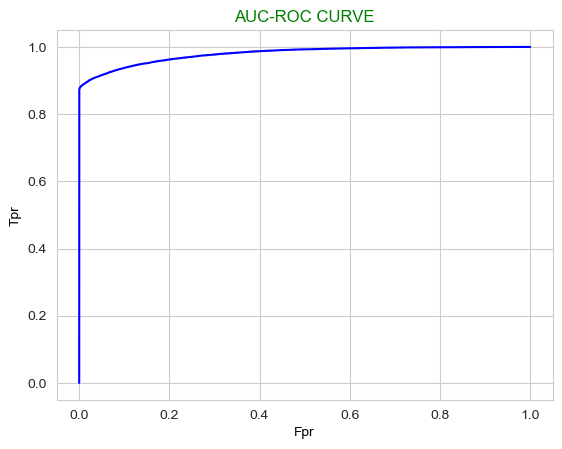

In [130]:
fpr,tpr,threshold=roc_curve(nsy_test,df1.iloc[:,1])
plt.plot(fpr,tpr,color="blue")
plt.xlabel("Fpr",color="black")
plt.ylabel("Tpr",color="black")
plt.title("AUC-ROC CURVE",color="Green")
plt.show()

# AUC_ROC CURVE CONCLUSION:
A high roc auc score indicated that the binary classification model is doing an excellent job of distinguishing between 
positive and negative instances.
In conclusion,a ROC AUC score of 0.95 suggests that the model is performing very well and well suited for the classification.

# COMPARISON OF ALL MODELS

In [131]:
display(BaseModels,Finall,FINAL66)

,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,89.712122,0.537367,0.125520,0.203504
1,DT,83.401876,0.244372,0.279717,0.260853
2,RF,88.972300,0.400312,0.279717,0.168635
3,KNN,89.492352,0.478589,0.106816,0.072951
4,NB,80.135779,0.232163,0.388820,0.290731
5,XGB,89.731706,0.546269,0.114090,0.188757


,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,76.685754,0.750257,0.798375,0.773569
1,DT,90.519982,0.897721,0.914097,0.905835
2,RF,94.069832,0.972457,0.906800,0.938482
3,KNN,80.494019,0.726843,0.975606,0.833050
4,NB,62.282532,0.693968,0.436254,0.535729
5,XGB,94.331886,0.986283,0.898871,0.940551


,Model Name,Accuracy,Precision,Recall,F1-Score
0,LG,76.714872,0.754740,0.790868,0.772382
1,DT,90.892437,0.909427,0.908124,0.908775
2,RF,93.487492,0.962994,0.904384,0.932769
3,KNN,80.669934,0.736339,0.954997,0.831534
4,NB,61.791182,0.694218,0.420206,0.523526
5,XGB,93.952151,0.984965,0.892556,0.936486


# CROSS VALIDATION

In [132]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import  accuracy_score,make_scorer
import xgboost as xgb

In [133]:
model=xgb.XGBClassifier()
num_folds=5
kf=KFold(n_splits=num_folds)
scores=cross_val_score(model,newx,y_smote,cv=kf,scoring="accuracy")

In [134]:
for fold,score in enumerate(scores):
    print(f"Fold{fold+1}:Accuracy={score:.2f}")

Fold1:Accuracy=0.90
Fold2:Accuracy=0.90
Fold3:Accuracy=0.91
Fold4:Accuracy=0.99
Fold5:Accuracy=0.99


In [135]:
print(f"Mean Accuracy={scores.mean():.2f}")

Mean Accuracy=0.94


In [136]:
from sklearn.model_selection import cross_val_predict
predicted_labels=cross_val_predict(model,newx,y_smote,cv=5)

In [137]:
precision=precision_score(y_smote,predicted_labels)
recall=recall_score(y_smote,predicted_labels)
f1=f1_score(y_smote,predicted_labels)
accuracy=accuracy_score(y_smote,predicted_labels)

In [138]:
l1=[accuracy]
l2=[precision]
l3=[recall]
l4=[f1]

In [139]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.98
Recall: 0.88
F1-score: 0.93


In [140]:
cross_val=pd.DataFrame({"ModelName":"KFold","Accuracy":l1,"Precision":l2,"Recall":l3,"F1-score":l4})
cross_val 

,ModelName,Accuracy,Precision,Recall,F1-score
0,KFold,0.930815,0.98014,0.87945,0.927069


# CONCLUSION:
After this cross validation, the accuracy,precision,recall,f1score are good.
we can conclude that the model is accurate and reliable in making predictions and it is likely a
good choice for the problem to be solved.